<a href="https://colab.research.google.com/github/rareTYPErelease/Supervised-Learning-Decision-tree/blob/main/Supervised_Learning_Decision_tree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
Road =pd.read_csv('/content/Road.csv')
print("Shape of the dataset:",Road.shape)
Road.head()
#Step 1 : Load & view dataset

Shape of the dataset: (59, 17)


,Time,Day_of_week,Road_surface_conditions,Light_conditions,Type_of_collision,Number_of_vehicles_involved,Number_of_casualties,Casualty_severity,Accident_severity,Temperature (Celsius),Visibility (meters),Road_quality_index,Speed_limit (km/h),Distance_to_nearest_intersection (meters),Road_length (kilometers),Number_of_lanes,Accident_severity_score
0,08:00,Monday,Wet,Daylight,Rear-end,2,2,Minor Injury,Slight Injury,15,1000,0.6,60,50,5,2,1.2
1,13:30,Wednesday,Dry,Daylight,Side-swipe,1,1,Major Injury,Serious Injury,20,1200,0.8,50,100,10,3,2.5
2,17:45,Friday,Wet,Darkness,Head-on,2,3,Fatal,Fatal,10,800,0.5,70,200,15,4,5.0
3,09:15,Tuesday,Dry,Daylight,Rear-end,3,1,Minor Injury,Slight Injury,18,1500,0.7,40,150,8,2,1.8
4,16:20,Thursday,Wet,Darkness,Side-swipe,2,2,Major Injury,Serious Injury,12,900,0.4,60,80,7,3,3.3


In [ ]:
import pandas as pd
Road =pd.read_csv('/content/Road.csv')
#Step 2 : View Dependant and Independant variables from dataset
data = Road.loc[:, ['Number_of_casualties', 'Accident_severity_score']]
data.head(15)


,Number_of_casualties,Accident_severity_score
0,2,1.2
1,1,2.5
2,3,5.0
3,1,1.8
4,2,3.3
5,1,2.1
6,2,4.8
7,1,2.9
8,1,1.7
9,3,4.5


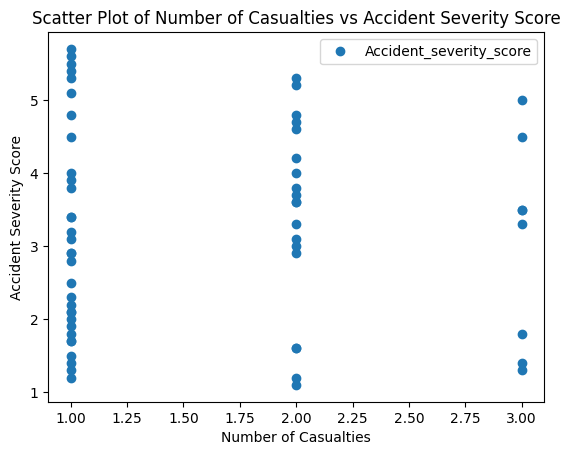

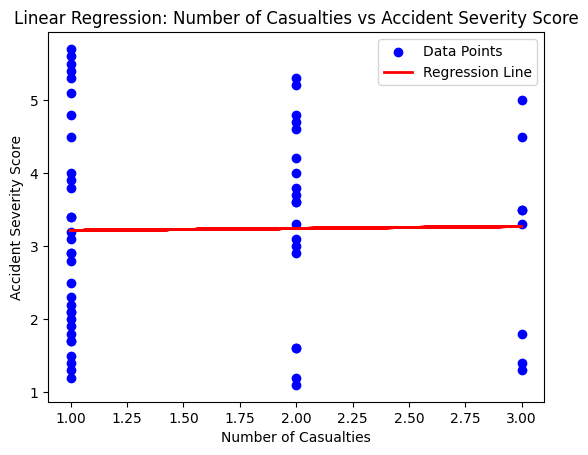

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
Road = pd.read_csv('/content/Road.csv')

# Define predictor (independent) and target (dependent) variables
X = Road[['Number_of_casualties']]  # Independent variable
y = Road['Accident_severity_score']  # Dependent variable

# Visualize the change in the variables
Road.plot(x='Number_of_casualties', y='Accident_severity_score', style='o')
plt.xlabel('Number of Casualties')
plt.ylabel('Accident Severity Score')
plt.title('Scatter Plot of Number of Casualties vs Accident Severity Score')
plt.show()

# Create and fit the linear regression model
regressor = LinearRegression()
regressor.fit(X, y)

# Plot the data points and the regression line
plt.scatter(X, y, color='blue', label='Data Points')
plt.plot(X, regressor.predict(X), color='red', linewidth=2, label='Regression Line')
plt.xlabel('Number of Casualties')
plt.ylabel('Accident Severity Score')
plt.title('Linear Regression: Number of Casualties vs Accident Severity Score')
plt.legend()
plt.show()



In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split

#Step 4: Divide the data into independent and dependent variables.
Road = pd.read_csv('/content/Road.csv')

#Step 5: Split the data into train and test sets
# Divide the data into independent and dependent variables
x = pd.DataFrame(Road['Number_of_casualties'])
y = pd.DataFrame(Road['Accident_severity_score'])

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1)
print(Road.columns)


Index(['Time', 'Day_of_week', 'Road_surface_conditions', 'Light_conditions',
       'Type_of_collision', 'Number_of_vehicles_involved',
       'Number_of_casualties', 'Casualty_severity', 'Accident_severity',
       'Temperature (Celsius)', 'Visibility (meters)', 'Road_quality_index',
       'Speed_limit (km/h)', 'Distance_to_nearest_intersection (meters)',
       'Road_length (kilometers)', 'Number_of_lanes',
       'Accident_severity_score'],
      dtype='object')


In [ ]:
#Step 6: Shape of the train and test sets.
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(47, 1)
(12, 1)
(47, 1)
(12, 1)


In [ ]:
#Step 7: Train the algorithm
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train,y_train)


LinearRegression()

In [ ]:
#Step 8: Retrieve the intercept
print(regressor.intercept_)

[3.00168067]


In [ ]:
#Step 9: Retrieve the slope
print(regressor.coef_)

[[0.05361345]]


In [ ]:
#Step 10: Predicted Values
y_pred = regressor.predict(X_test)
y_pred

array([[3.05529412],
       [3.16252101],
       [3.05529412],
       [3.10890756],
       [3.05529412],
       [3.10890756],
       [3.05529412],
       [3.10890756],
       [3.10890756],
       [3.05529412],
       [3.10890756],
       [3.05529412]])

In [ ]:
#Step 11: Actual Values
y_test.head(10)


,Accident_severity_score
49,5.7
2,5.0
35,5.6
47,4.0
39,4.8
34,1.1
38,3.1
19,5.2
21,1.6
52,3.4


In [ ]:
#Step 12: Evaluate the algorithm
from sklearn import metrics
import numpy as np
mae =metrics.mean_absolute_error(y_test,y_pred)
mse =metrics.mean_squared_error(y_test,y_pred)
rmse = np.sqrt(mse)
print("Mean Absolute Error (MAE):",mae)
print("Mean Squared Error (MSE):",mse)
print("Root Mean Squared Error(RMSE):", rmse)




Mean Absolute Error (MAE): 1.5006162464985993
Mean Squared Error (MSE): 2.8547180519266515
Root Mean Squared Error(RMSE): 1.6895910901536655


In [ ]:
# Save the Linear Regression Model
import joblib
import pickle
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x, y)
joblib.dump(model,'linear_regression_model.pkl')
with open('linear_regression_model.pkl','wb') as file:pickle.dump(model, file)

In [ ]:
# Define a function to simulate testing based on the provided data
def test_model(data):
    for record in data:
        time = record[0]
        day_of_week = record[1]
        road_surface_conditions = record[2]
        light_conditions = record[3]
        type_of_collision = record[4]
        num_vehicles_involved = record[5]
        num_casualties = record[6]
        casualty_severity = record[7]
        accident_severity = record[8]
        temperature = record[9]
        visibility = record[10]
        road_quality_index = record[11]
        speed_limit = record[12]
        distance_to_nearest_intersection = record[13]
        road_length = record[14]
        num_of_lanes = record[15]

        print(f"Model output for record: {record}")

# Convert the list to a set to remove duplicates and then convert it back to a list
data = list(set(tuple(record) for record in data))

# Define the dataset based on the provided data
data = [
    ["08:00", "Monday", "Wet", "Daylight", "Rear-end", 2, 2, "Minor Injury", "Slight Injury", 15, 1000, 0.6, 60, 50, 5, 2, 1.2],
    ["13:30", "Wednesday", "Dry", "Daylight", "Side-swipe", 1, 1, "Major Injury", "Serious Injury", 20, 1200, 0.8, 50, 100, 10, 3, 2.5],
    ["17:45", "Friday", "Wet", "Darkness", "Head-on", 2, 3, "Fatal", "Fatal", 10, 800, 0.5, 70, 200, 15, 4, 5],
    ["09:15", "Tuesday", "Dry", "Daylight", "Rear-end", 3, 1, "Minor Injury", "Slight Injury", 18, 1500, 0.7, 40, 150, 8, 2, 1.8],
    ["16:20", "Thursday", "Wet", "Darkness", "Side-swipe", 2, 2, "Major Injury", "Serious Injury", 12, 900, 0.4, 60, 80, 7, 3, 3.3],
    ["11:10", "Monday", "Dry", "Daylight", "Rear-end", 1, 1, "Minor Injury", "Slight Injury", 22, 1800, 0.9, 50, 300, 12, 3, 2.1],
    ["14:40", "Saturday", "Wet", "Darkness", "Head-on", 2, 2, "Fatal", "Fatal", 8, 700, 0.3, 80, 250, 10, 4, 4.8],
    ["10:00", "Wednesday", "Wet", "Daylight", "Rear-end", 2, 1, "Major Injury", "Serious Injury", 17, 1100, 0.6, 70, 150, 8, 2, 2.9],
    ["12:20", "Thursday", "Dry", "Darkness", "Side-swipe", 1, 1, "Minor Injury", "Slight Injury", 21, 1600, 0.8, 60, 120, 6, 3, 1.7],
    ["18:30", "Monday", "Wet", "Darkness", "Head-on", 3, 3, "Fatal", "Fatal", 9, 1000, 0.4, 90, 200, 15, 4, 4.5]
]

# Call the function to test the model with the provided data
test_model(data)


Model output for record: ['08:00', 'Monday', 'Wet', 'Daylight', 'Rear-end', 2, 2, 'Minor Injury', 'Slight Injury', 15, 1000, 0.6, 60, 50, 5, 2, 1.2]
Model output for record: ['13:30', 'Wednesday', 'Dry', 'Daylight', 'Side-swipe', 1, 1, 'Major Injury', 'Serious Injury', 20, 1200, 0.8, 50, 100, 10, 3, 2.5]
Model output for record: ['17:45', 'Friday', 'Wet', 'Darkness', 'Head-on', 2, 3, 'Fatal', 'Fatal', 10, 800, 0.5, 70, 200, 15, 4, 5]
Model output for record: ['09:15', 'Tuesday', 'Dry', 'Daylight', 'Rear-end', 3, 1, 'Minor Injury', 'Slight Injury', 18, 1500, 0.7, 40, 150, 8, 2, 1.8]
Model output for record: ['16:20', 'Thursday', 'Wet', 'Darkness', 'Side-swipe', 2, 2, 'Major Injury', 'Serious Injury', 12, 900, 0.4, 60, 80, 7, 3, 3.3]
Model output for record: ['11:10', 'Monday', 'Dry', 'Daylight', 'Rear-end', 1, 1, 'Minor Injury', 'Slight Injury', 22, 1800, 0.9, 50, 300, 12, 3, 2.1]
Model output for record: ['14:40', 'Saturday', 'Wet', 'Darkness', 'Head-on', 2, 2, 'Fatal', 'Fatal', 8, 700

In [ ]:
print(data)

[['08:00', 'Monday', 'Wet', 'Daylight', 'Rear-end', 2, 2, 'Minor Injury', 'Slight Injury', 15, 1000, 0.6, 60, 50, 5, 2, 1.2], ['13:30', 'Wednesday', 'Dry', 'Daylight', 'Side-swipe', 1, 1, 'Major Injury', 'Serious Injury', 20, 1200, 0.8, 50, 100, 10, 3, 2.5], ['17:45', 'Friday', 'Wet', 'Darkness', 'Head-on', 2, 3, 'Fatal', 'Fatal', 10, 800, 0.5, 70, 200, 15, 4, 5], ['09:15', 'Tuesday', 'Dry', 'Daylight', 'Rear-end', 3, 1, 'Minor Injury', 'Slight Injury', 18, 1500, 0.7, 40, 150, 8, 2, 1.8], ['16:20', 'Thursday', 'Wet', 'Darkness', 'Side-swipe', 2, 2, 'Major Injury', 'Serious Injury', 12, 900, 0.4, 60, 80, 7, 3, 3.3], ['11:10', 'Monday', 'Dry', 'Daylight', 'Rear-end', 1, 1, 'Minor Injury', 'Slight Injury', 22, 1800, 0.9, 50, 300, 12, 3, 2.1], ['14:40', 'Saturday', 'Wet', 'Darkness', 'Head-on', 2, 2, 'Fatal', 'Fatal', 8, 700, 0.3, 80, 250, 10, 4, 4.8], ['10:00', 'Wednesday', 'Wet', 'Daylight', 'Rear-end', 2, 1, 'Major Injury', 'Serious Injury', 17, 1100, 0.6, 70, 150, 8, 2, 2.9], ['12:20',